In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers

In [20]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS = 3
EPOCHS = 50

In [21]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Training",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 3251 files belonging to 3 classes.


In [22]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"../input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Validation",
shuffle = True,
image_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 416 files belonging to 3 classes.


In [23]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"../input/potato-disease-leaf-datasetpld/PLD_3_Classes_256/Testing",
shuffle = True,
image_size = (IMAGE_SIZE, IMAGE_SIZE))

Found 405 files belonging to 3 classes.


In [24]:
class_names = train_ds.class_names
class_names

['Early_Blight', 'Healthy', 'Late_Blight']

(32, 256, 256, 3)
[1 0 0 2 1 0 2 1 1 0 2 2 1 2 0 0 1 2 0 2 2 2 2 2 2 1 1 0 0 1 2 2]


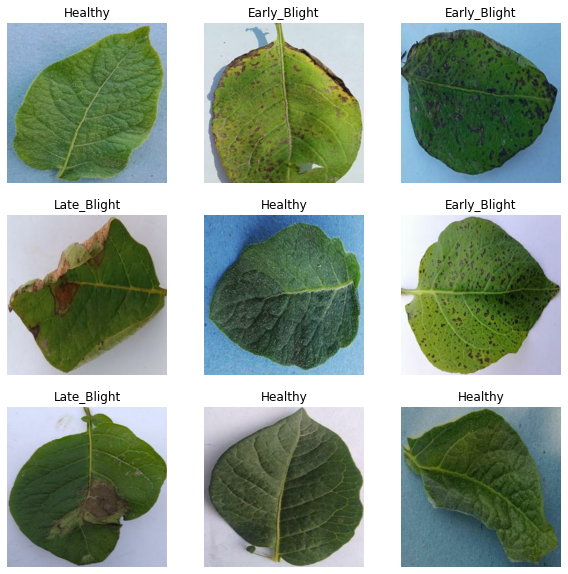

In [25]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in train_ds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(0,9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
        

In [26]:
len(train_ds)

102

In [27]:
# def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
#     assert (train_split + test_split + val_split) == 1
    
#     ds_size = len(ds)
    
#     if shuffle:
#         ds = ds.shuffle(shuffle_size, seed=12)
    
#     train_size = int(train_split * ds_size)
#     val_size = int(val_split * ds_size)
    
#     train_ds = ds.take(train_size)    
#     val_ds = ds.skip(train_size).take(val_size)
#     test_ds = ds.skip(train_size).skip(val_size)
    
#     return train_ds, val_ds, test_ds

In [28]:
# train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [29]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [30]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [31]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
  layers.experimental.preprocessing.RandomContrast(0.2),
  layers.experimental.preprocessing.RandomZoom(0.2)
])

In [32]:
# train_ds = train_ds.map(
#     lambda x, y: (data_augmentation(x, training=True), y)
# ).prefetch(buffer_size=tf.data.AUTOTUNE)

In [33]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [34]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
sequential_4 (Sequential)    (32, 256, 256, 3)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (32, 254, 254, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (32, 127, 127, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (32, 125, 125, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (32, 62, 62, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (32, 60, 60, 64)         

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/50
102/102 [==============================] - 10s 45ms/step - loss: 1.0666 - accuracy: 0.4051 - val_loss: 1.0082 - val_accuracy: 0.4519
Epoch 2/50
102/102 [==============================] - 4s 38ms/step - loss: 0.9622 - accuracy: 0.5466 - val_loss: 0.9486 - val_accuracy: 0.5361
Epoch 3/50
102/102 [==============================] - 4s 39ms/step - loss: 0.8106 - accuracy: 0.6669 - val_loss: 0.5972 - val_accuracy: 0.7644
Epoch 4/50
102/102 [==============================] - 4s 38ms/step - loss: 0.6004 - accuracy: 0.7570 - val_loss: 0.5048 - val_accuracy: 0.7933
Epoch 5/50
102/102 [==============================] - 4s 40ms/step - loss: 0.4803 - accuracy: 0.8139 - val_loss: 0.3794 - val_accuracy: 0.8510
Epoch 6/50
102/102 [==============================] - 4s 38ms/step - loss: 0.3383 - accuracy: 0.8708 - val_loss: 0.3350 - val_accuracy: 0.8774
Epoch 7/50
102/102 [==============================] - 4s 40ms/step - loss: 0.2468 - accuracy: 0.9043 - val_loss: 0.2804 - val_accuracy: 0.896

In [37]:
scores = model.evaluate(test_ds)

13/13 [==============================] - 1s 25ms/step - loss: 0.0958 - accuracy: 0.9654


In [38]:
scores

[0.09583509713411331, 0.9654321074485779]

In [39]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 102}

In [40]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [41]:
history.history["loss"]

[1.0666029453277588,
 0.9621965289115906,
 0.8105552792549133,
 0.6003553867340088,
 0.480313777923584,
 0.3382773995399475,
 0.24678592383861542,
 0.21072332561016083,
 0.1965198665857315,
 0.14824353158473969,
 0.12713311612606049,
 0.10919705778360367,
 0.11654862761497498,
 0.11432306468486786,
 0.10969583690166473,
 0.102036252617836,
 0.11358363926410675,
 0.08848150074481964,
 0.08180736750364304,
 0.08765876293182373,
 0.10696306824684143,
 0.07244250178337097,
 0.06717871129512787,
 0.0955204889178276,
 0.06945254653692245,
 0.06525113433599472,
 0.0664537101984024,
 0.0945982038974762,
 0.0876261442899704,
 0.07730190455913544,
 0.08037108182907104,
 0.04766247794032097,
 0.06302115321159363,
 0.05239364877343178,
 0.07011275738477707,
 0.054780229926109314,
 0.05057337135076523,
 0.0752282589673996,
 0.048093222081661224,
 0.03355266526341438,
 0.07272796332836151,
 0.06930900365114212,
 0.06188304349780083,
 0.05047883093357086,
 0.03609900549054146,
 0.04494287446141243,
 

In [42]:
history.history["accuracy"]

[0.4051061272621155,
 0.5466010570526123,
 0.6668717265129089,
 0.75699782371521,
 0.8139033913612366,
 0.8708089590072632,
 0.9043371081352234,
 0.9252537488937378,
 0.9310981035232544,
 0.9523223638534546,
 0.958474338054657,
 0.968317449092865,
 0.9630882740020752,
 0.9621654748916626,
 0.9649338722229004,
 0.9680098295211792,
 0.9652414917945862,
 0.973239004611969,
 0.9726238250732422,
 0.970778226852417,
 0.9673946499824524,
 0.9796985387802124,
 0.978160560131073,
 0.9698554277420044,
 0.9790833592414856,
 0.9787757396697998,
 0.9772377610206604,
 0.965856671333313,
 0.9735466241836548,
 0.9763149619102478,
 0.9753921627998352,
 0.9849277138710022,
 0.9790833592414856,
 0.9833897352218628,
 0.9778529405593872,
 0.985542893409729,
 0.983082115650177,
 0.9790833592414856,
 0.982774555683136,
 0.9886189103126526,
 0.9772377610206604,
 0.9796985387802124,
 0.9778529405593872,
 0.9861581325531006,
 0.98769611120224,
 0.9843125343322754,
 0.9793909788131714,
 0.9833897352218628,
 0.98

In [44]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

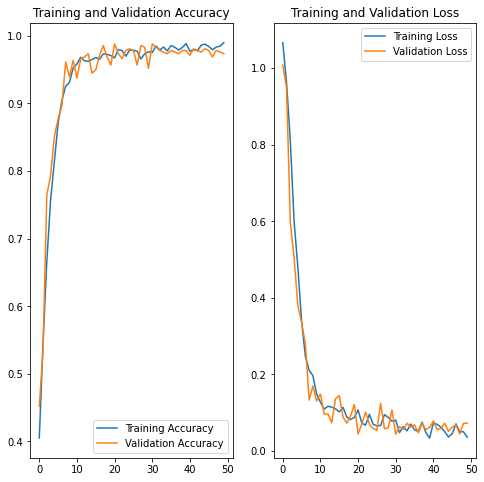

In [45]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: Early_Blight
predicted label: Early_Blight


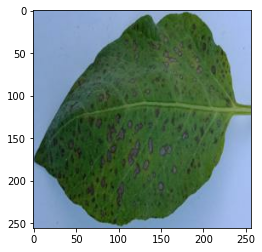

In [46]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

In [47]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

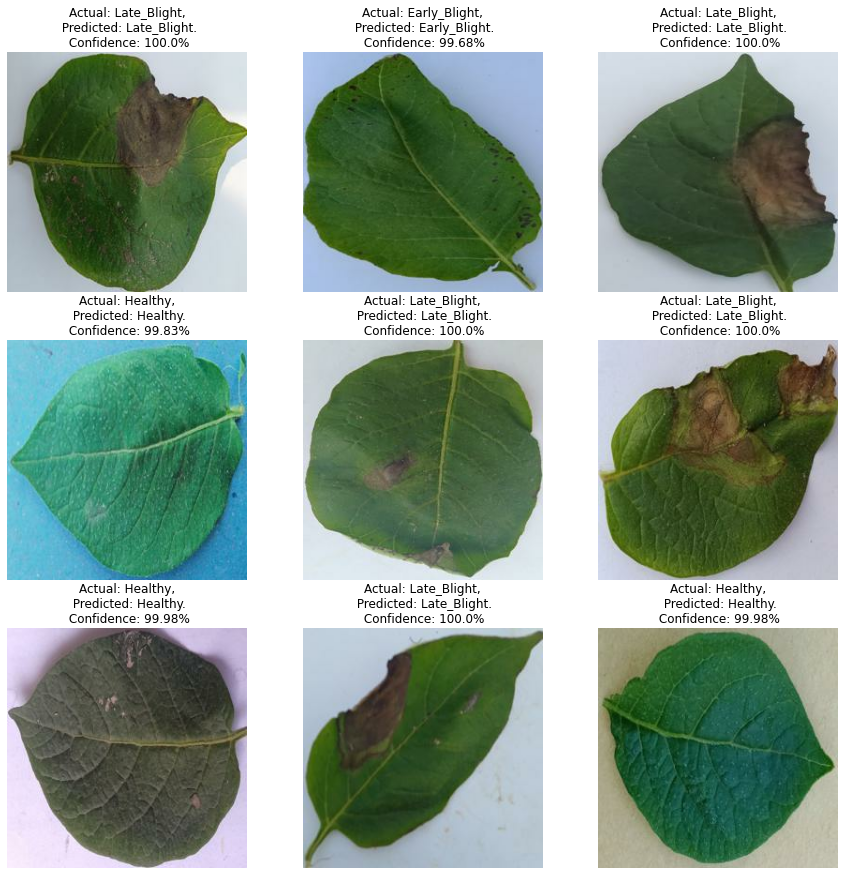

In [48]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
!pip install joblib
import joblib
joblib.dump(model, 'model_joblib')